In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import math

In [3]:
# Download training data from open datasets.
training_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
        )
# Download test data from open datasets.
test_data = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
        )

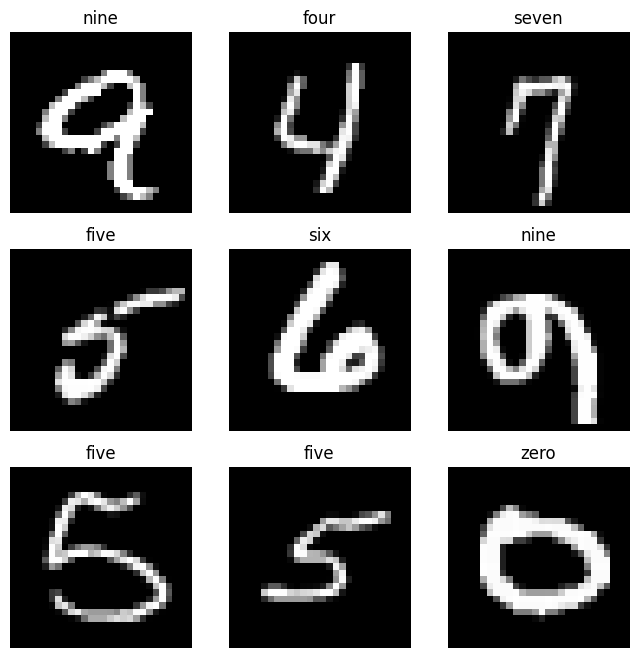

In [14]:
labels_map = {i: training_data.classes[i].split()[-1] for i in range(10)}


def plot_samples(data, labels_map, rows=3, cols=3):
    figure = plt.figure(figsize=(8, 8))
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()


plot_samples(training_data, labels_map)

rows: 2, cols: 5












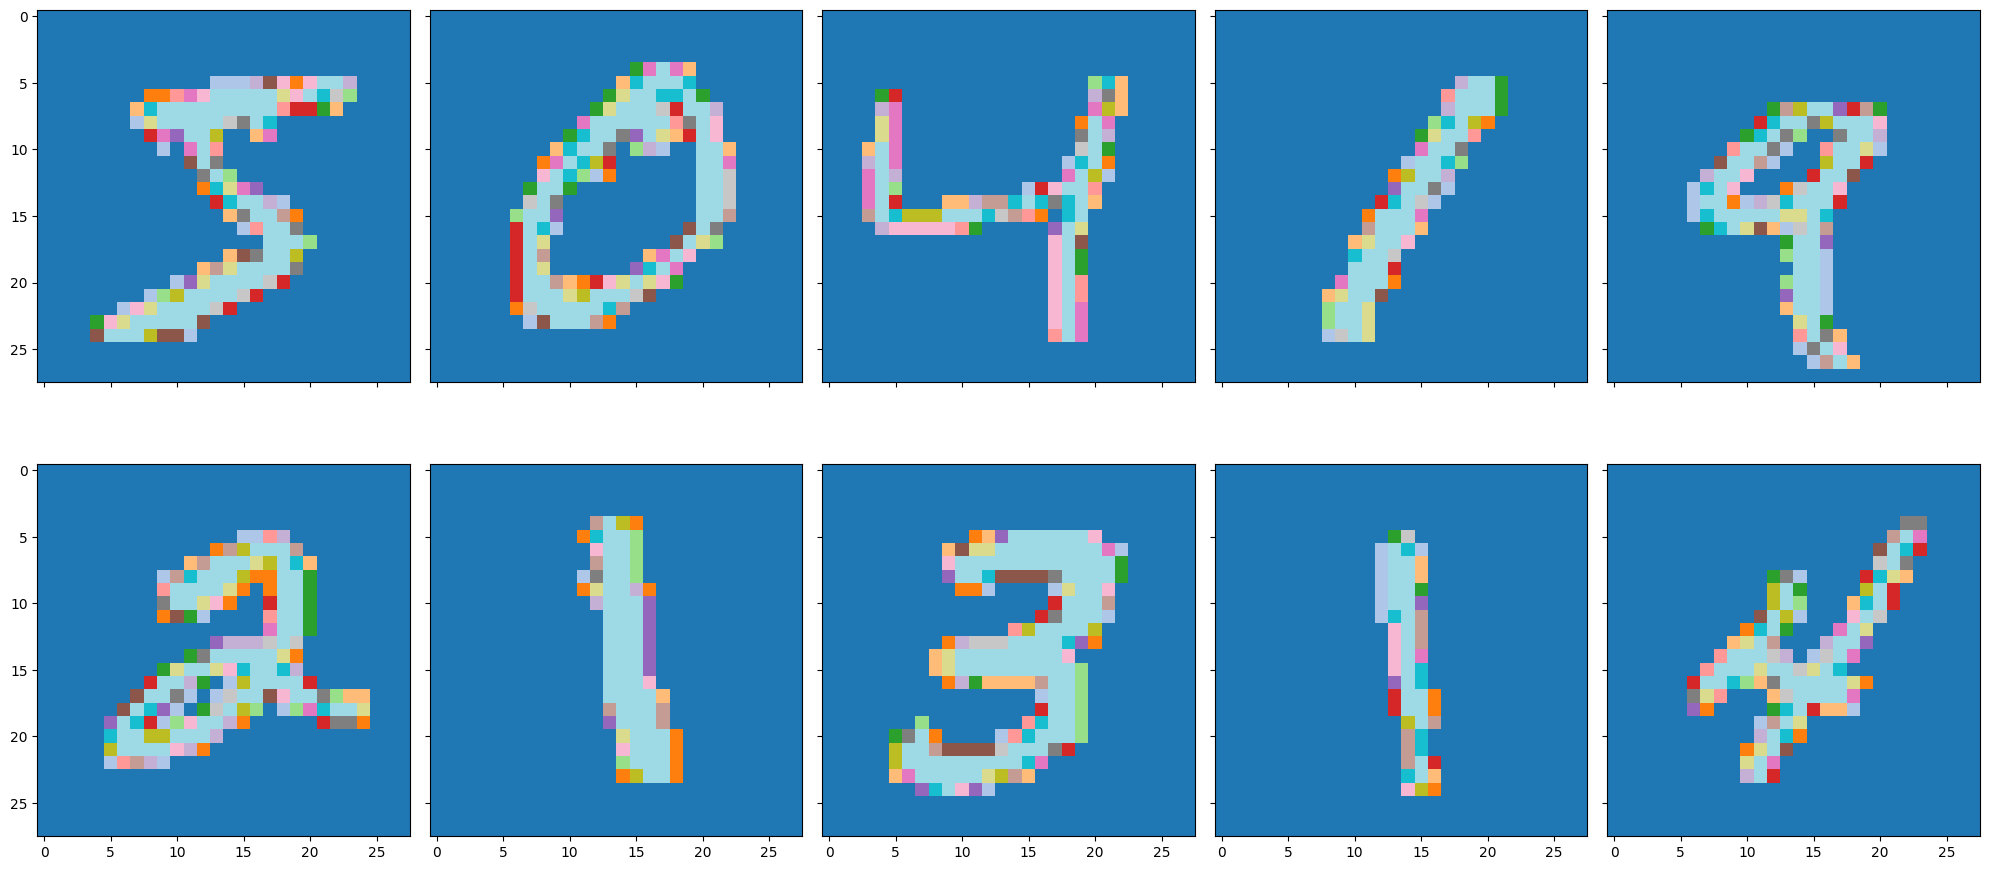

In [54]:
def plot_samples(data,
                 n=5,
                 max_cols=5,
                 cmap="tab20"
                 ):
    n = min(len(data), n)
    if n < max_cols:
        rows = 1
        cols = n
    else:
        rows = math.ceil(n / max_cols)
        cols = max_cols
    print(f"rows: {rows}, cols: {cols}")
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(20, 10))
    #ax = ax.flatten()
    index = 0
    for i in range(rows):
        for j in range(cols):
            img = data[index]
            index += 1
            #    .numpy().reshape(X.shape[1],X.shape[2],2)
            print()
            ax[i, j].imshow(img, cmap=cmap, interpolation='nearest')
            if index >= n:
                break

    #ax[0].set_xticks([])
    #ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()


plot_samples(training_data.data, 10)

In [79]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, num_workers=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [42]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
                nn.Linear(28 * 28, 10),
                nn.ReLU(),
                nn.Linear(10, 10)
                )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        output = nn.Softmax(dim=1)(logits)
        return output


model = NeuralNetwork().to("mps")

In [55]:
img = x[0][0]
logits = model(img.to("mps"))
print(logits)
softmax = nn.Softmax(dim=1)
out_probs = softmax(logits)
print(out_probs)
y_pred = out_probs.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[0.1026, 0.0921, 0.0798, 0.1297, 0.1212, 0.0748, 0.0728, 0.0818, 0.1393,
         0.1058]], device='mps:0', grad_fn=<SoftmaxBackward0>)
tensor([[0.1002, 0.0992, 0.0980, 0.1030, 0.1021, 0.0975, 0.0973, 0.0982, 0.1040,
         0.1006]], device='mps:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([8], device='mps:0')


In [ ]:
linear = nn.Linear(28 * 28, 10)
relu = nn.ReLU()
linear.to("mps")

In [98]:
img_tensor = torch.flatten(img, start_dim=1).to("mps")
img_out = linear(img_tensor)
print(torch.argmax(img_out), torch.argmin(img_out))
print(img_out)
print(relu(img_out))

tensor(7, device='mps:0') tensor(6, device='mps:0')
tensor([[ 0.0601,  0.1725, -0.1918,  0.1855,  0.0604, -0.2875, -0.3421,  0.3181,
         -0.0096, -0.1491]], device='mps:0', grad_fn=<LinearBackward0>)
tensor([[0.0601, 0.1725, 0.0000, 0.1855, 0.0604, 0.0000, 0.0000, 0.3181, 0.0000,
         0.0000]], device='mps:0', grad_fn=<ReluBackward0>)


In [105]:
[torch.nn.CrossEntropyLoss()(img_out, torch.tensor([i]).to("mps")) for i in range(10)]


[tensor(2.2454, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.1330, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.4972, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.1200, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.2450, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.5929, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.6475, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(1.9873, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.3150, device='mps:0', grad_fn=<NllLossBackward0>),
 tensor(2.4545, device='mps:0', grad_fn=<NllLossBackward0>)]

In [106]:
one_hot = torch.zeros(10)
one_hot[5] = 1
one_hot = torch.reshape(one_hot, (1, 10))
[torch.nn.CrossEntropyLoss()(one_hot, torch.tensor([i])) for i in range(10)]

[tensor(2.4612),
 tensor(2.4612),
 tensor(2.4612),
 tensor(2.4612),
 tensor(2.4612),
 tensor(1.4612),
 tensor(2.4612),
 tensor(2.4612),
 tensor(2.4612),
 tensor(2.4612)]

In [120]:
const = torch.ones(10) / 10
const = torch.reshape(const, (1, 10))
[torch.nn.CrossEntropyLoss()(const, torch.tensor([i])) for i in range(10)]

[tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026),
 tensor(2.3026)]

In [119]:
import numpy as np

input = one_hot
factor = sum([math.exp(input[0][j]) for j in range(10)])
print(factor)
softmax = np.array([math.exp(input[0][i]) for i in range(10)]) / factor
print(softmax)
-np.log(softmax)

11.718281828459045
[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.23196932
 0.08533674 0.08533674 0.08533674 0.08533674]


array([2.46115017, 2.46115017, 2.46115017, 2.46115017, 2.46115017,
       1.46115017, 2.46115017, 2.46115017, 2.46115017, 2.46115017])

In [132]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X.to("mps")
        y.to("mps")
        # Compute prediction and loss
        pred = model(X.to("mps"))
        loss = loss_fn(pred, y.to("mps"))

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = torch.tensor(X.numpy(), device="mps")
            y = torch.tensor(y.numpy(), device="mps")
            pred = model(X.to("mps"))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


learning_rate = 1e-1
batch_size = 64

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    model.to("mps")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.953229  [   64/60000]
loss: 1.839385  [ 6464/60000]
loss: 1.886296  [12864/60000]
loss: 1.778021  [19264/60000]
loss: 1.810180  [25664/60000]
loss: 1.778394  [32064/60000]
loss: 1.716803  [38464/60000]
loss: 1.842084  [44864/60000]
loss: 1.754563  [51264/60000]
loss: 1.636288  [57664/60000]
Test Error: 
 Accuracy: 79.4%, Avg loss: 1.697793 

Epoch 2
-------------------------------
loss: 1.732076  [   64/60000]
loss: 1.749408  [ 6464/60000]
loss: 1.740377  [12864/60000]
loss: 1.744645  [19264/60000]
loss: 1.605773  [25664/60000]
loss: 1.607395  [32064/60000]
loss: 1.636507  [38464/60000]
loss: 1.527491  [44864/60000]
loss: 1.582434  [51264/60000]
loss: 1.598395  [57664/60000]
Test Error: 
 Accuracy: 89.1%, Avg loss: 1.589087 

Epoch 3
-------------------------------
loss: 1.600974  [   64/60000]
loss: 1.648111  [ 6464/60000]
loss: 1.626210  [12864/60000]
loss: 1.566042  [19264/60000]
loss: 1.566586  [25664/60000]
loss: 1.547138  [32064/600

In [67]:
dataloader = test_dataloader
model.eval()
size = len(dataloader.dataset)
num_batches = len(dataloader)
test_loss, correct = 0, 0

In [124]:
# Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
# also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
model.to("mps")
with torch.no_grad():
    for X, y in dataloader:
        X.to("mps")
        X1 = X.clone()
        X1.to("mps")
        print(X1.device)
        y.to("mps")
        print(y.device)
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        test_loss.to("mps")
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

cpu
cpu


RuntimeError: Tensor for argument input is on cpu but expected on mps

In [128]:
X1 = torch.tensor(X.numpy(), device="mps")
print(X1.device)

mps:0


In [78]:
for X, y in train_dataloader:
    X.to("mps")
    print(X.device)
    y.to("mps")
    print(y.device)

cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu
cpu


In [ ]:
test_loss /= num_batches
correct /= size
print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


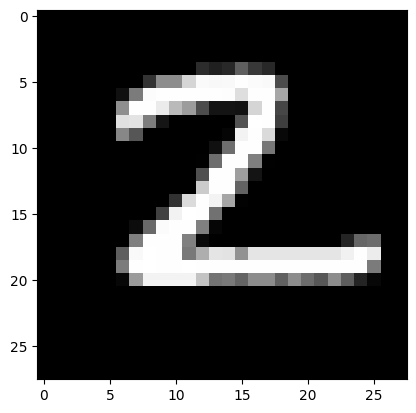

Label: 2


In [16]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense
